<a href="https://colab.research.google.com/github/prithwis/parashar21/blob/main/P21_Retrieve_v4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://1.bp.blogspot.com/_5QlanosqxiQ/SXLOLTu7S7I/AAAAAAAAAm8/0r6C7lCxsic/S1600-R/p21-header-003.png) <br>


---


![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png) ||
[Prithwis Mukerjee](http://www.yantrajaal.com) ||
Website - [Parashar21](https://parashar21.blogspot.com)<br>

#SetUp

##Installs

In [57]:
!pip -qq install pyswisseph                 # https://stackoverflow.com/questions/64277506/pip-install-options-unclear
!pip -qq install python-docx                #https://python-docx.readthedocs.io/en/latest/
!pip -qq install python_string_utils
!apt install mongodb > /dev/null

In [58]:
#Utility functions 
from pymongo import MongoClient
import pandas as pd
import dateutil
#import matplotlib.pyplot as plt
import math
import json
from docx import Document
from docx.shared import Inches
from docx.enum.text import WD_ALIGN_PARAGRAPH
from datetime import datetime
from datetime import timedelta
import pytz


In [59]:
#Load p21 modules from github
!wget -O p21.py -q https://raw.githubusercontent.com/prithwis/parashar21/main/utils/p21.py                  # all global variables
!wget -O p21utils.py -q https://raw.githubusercontent.com/prithwis/parashar21/main/utils/p21utils.py        # large number of utility functions
# ---------------------------
import p21
import p21utils

!wget -O Saraswati.png -q https://github.com/prithwis/parashar21/raw/main/images/Saraswati02.png                  # all global variables

In [60]:
#!cat p21utils.py
# ------------------------------------------------
# required for multiple imports of the same module
# ------------------------------------------------
import importlib
importlib.reload(p21)
importlib.reload(p21utils)

p21utils imported


<module 'p21utils' from '/content/p21utils.py'>

In [61]:
from google.colab import drive
drive.mount('/content/drive')
# -------------------------------------------
# copy credentials file
!cp /content/drive/'My Drive'/Praxis/WebCredentials/clevercloudMongoDB.py credentials.py
# -------------------------------------------
# MongoDB credentials are stored here
#
from credentials import rhostName,ruserName,rpassWord,rdbName,rMongoURI
print(rdbName)
# -------------------------------------------
mongoURI = rMongoURI                                   # for remote server
client = MongoClient(mongoURI)
client.list_database_names() # ['admin', 'local']
# ----------------------------------------------
# Show existing Collections
db = client.btncgfi3a5bxyea
pd.DataFrame(list(db.list_collections()))
kollection = db.khona21_43                   # Set the collection to work with

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
btncgfi3a5bxyea


## Database Status

In [65]:
kollection.count_documents({})

5

In [78]:
db.command("dbStats") 

{'$clusterTime': {'clusterTime': Timestamp(1642165051, 125),
  'signature': {'hash': b'\xb1\xfd\\`\x94\xf1\xa9>tOf6\x91J\x8e\xd2\xb8\xe6\xc5m',
   'keyId': 7017346210788802561}},
 'avgObjSize': 472.3524590163934,
 'collections': 3,
 'dataSize': 1786437.0,
 'db': 'btncgfi3a5bxyea',
 'fsTotalSize': 268381962240.0,
 'fsUsedSize': 212147167232.0,
 'indexSize': 90112.0,
 'indexes': 3,
 'numExtents': 0,
 'objects': 3782,
 'ok': 1.0,
 'operationTime': Timestamp(1642165051, 125),
 'storageSize': 835584.0,
 'views': 0}

In [80]:
db.command( {
   "dbStats": 1,
   "scale": 1024 
} )

{'$clusterTime': {'clusterTime': Timestamp(1642165121, 102),
  'signature': {'hash': b'\x86\x17\x98)\xee\xb6\xd3\xaf02\x1b\xc24\x86S\xa2\xec\xe1\xc4\xc4',
   'keyId': 7017346210788802561}},
 'avgObjSize': 472.3524590163934,
 'collections': 3,
 'dataSize': 1744.5673828125,
 'db': 'btncgfi3a5bxyea',
 'fsTotalSize': 262091760.0,
 'fsUsedSize': 207176972.0,
 'indexSize': 88.0,
 'indexes': 3,
 'numExtents': 0,
 'objects': 3782,
 'ok': 1.0,
 'operationTime': Timestamp(1642165121, 102),
 'storageSize': 816.0,
 'views': 0}

#Analysis Procedures

In [ ]:
def R511_parseChartData(c):

    p21.GLon = c['GLon']
    p21.GRet = c['GRet']
    pid = c['pid']
    p21.pName = pid['name']
    p21.GrahaLordBhav = c['GrahaLordBhav']
    p21.Lord = c['Lord']
    p21.GrahaBhava = c['GrahaBhava']
    p21.LordBhav = c['LordBhav']
    p21.exaltG = c['exaltG']
    p21.exaltL = c['exaltL']
    p21.debilG = c['debilG']
    p21.debilL = c['debilL']
    p21.inFriendG = c['inFriendG']
    p21.inFriendL = c['inFriendL']
    p21.inEnemyG = c['inEnemyG']
    p21.inEnemyL = c['inEnemyL']
    

In [ ]:
def R512_FormatPage():
       
    p21.document.add_page_break()
    
    p2 = p21.document.add_paragraph()
    run_1 = p2.add_run()
    run_1.add_picture('./RashiChart.png', width=Inches(3.0))
    run_2 = p2.add_run()
    run_2.add_picture('./NavamsaChart.png', width=Inches(3.0))
    #p1 = p21.document.add_paragraph(p21.pName)                                             # skip printing name
    
    p21.document.add_paragraph(p21utils.R13A_ShowTrueDict('Retrograde Graha',p21.GRet))     # Show Grahas that are retrograde

    cPara = p21utils.R13B_ListPositions('Lord of ',p21.Lord)                                # Show Lords
    cPara = cPara+"\n"
    cPara = cPara+'Graha Lord of \n'+json.dumps(p21.GrahaLordBhav)                          # Show the Bhavs of whicha Graha is Lord
    p21.document.add_paragraph(cPara)

    p21.document.add_paragraph(p21utils.R13B_ListPositions('Lord in Bhava',p21.LordBhav))   # Which Lord in which Bhav

    cPara = 'Graha Status\n'
    cPara = cPara+p21utils.R13A_ShowTrueDict('Exalted     : ',p21.exaltG)+'\n'
    cPara = cPara+p21utils.R13A_ShowTrueDict('Debilitated : ',p21.debilG)+'\n'
    cPara = cPara+p21utils.R13A_ShowTrueDict('in Friend   : ',p21.inFriendG)+'\n'
    cPara = cPara+p21utils.R13A_ShowTrueDict('in Enemy    : ',p21.inEnemyG)
    p21.document.add_paragraph(cPara)

    cPara = 'Lord Status\n'
    cPara = cPara+p21utils.R13C_ListPositions('Exalted     : ',p21.exaltL)+'\n'
    cPara = cPara+p21utils.R13C_ListPositions('Debilitated : ',p21.debilL)+'\n'
    cPara = cPara+p21utils.R13C_ListPositions('In Friend   : ',p21.inFriendL)+'\n'
    cPara = cPara+p21utils.R13C_ListPositions('In Enemy    : ',p21.inEnemyL)
    p21.document.add_paragraph(cPara)

'''

    print('exalted Graha',p21.exaltG)
    print('exalted Lord',p21.exaltL)
    print('debil Graha',p21.debilG)
    print('debil Lord',p21.debilL)
'''
    
    #p21.document.add_page_break()

"\n\n    print('exalted Graha',p21.exaltG)\n    print('exalted Lord',p21.exaltL)\n    print('debil Graha',p21.debilG)\n    print('debil Lord',p21.debilL)\n"

In [ ]:
def R51_processChart(c):
    R511_parseChartData(c)              # Break up database data into useful pieces
                                        # Creates two primary dicts, GLon, GRet
    for ctype in ['Rashi','Navamsa']:
        p21.ChartType = ctype
        p21utils.R11_LocateGrahaInRashi()   # Converts Graha Long to Rashi positions
                                            # Rashi Num as well as Rashi name
        p21utils.R12B_drawChart_Bengal()    # Draw Chart in Bengal style
                                            # Needs to know type, Natal or Navamsha
    R512_FormatPage()
    #print(c)

#Retrieve Charts 

In [ ]:
'''
c = kollection.find({},{'pid.tags':1,'pid.ck':1,'_id':0})
for crnt in c:
    print(crnt)
'''

"\nc = kollection.find({},{'pid.tags':1,'pid.ck':1,'_id':0})\nfor crnt in c:\n    print(crnt)\n"

In [ ]:
c = kollection.find({'pid.tags': {"$in": ['PostGraduate']}},{'_id':0})
for crnt in c:
    print(crnt)

{'pid': {'tags': ['Engineer', 'Teacher', 'PostGraduate'], 'ck': 'M1961101523:425.522.5788.37', 'name': 'mosu'}, 'GLon': {'La': 98.204, 'Su': 178.826, 'Mo': 250.52, 'Ma': 196.183, 'Me': 193.17, 'Ju': 274.781, 'Ve': 153.753, 'Sa': 270.179, 'Ra': 122.089, 'Ke': 302.089}, 'GRet': {'La': False, 'Su': False, 'Mo': False, 'Ma': False, 'Me': True, 'Ju': False, 'Ve': False, 'Sa': False, 'Ra': False, 'Ke': False}, 'BhavN': [' ', 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3], 'BhavA': [' ', 'Can', 'Leo', 'Vir', 'Lib', 'Sco', 'Sag', 'Cap', 'Acq', 'Pis', 'Ari', 'Tau', 'Gem'], 'Lord': [' ', 'Mo', 'Su', 'Me', 'Ve', 'Ma', 'Ju', 'Sa', 'Sa', 'Ju', 'Ma', 'Ve', 'Me'], 'LordRashiN': [' ', 9, 6, 7, 6, 7, 10, 10, 10, 10, 7, 6, 7], 'LordRashiA': [' ', 'Sag', 'Vir', 'Lib', 'Vir', 'Lib', 'Cap', 'Cap', 'Cap', 'Cap', 'Lib', 'Vir', 'Lib'], 'GrahaLordBhav': {'Su': [2], 'Mo': [1], 'Ma': [5, 10], 'Me': [3, 12], 'Ju': [6, 9], 'Ve': [4, 11], 'Sa': [7, 8]}, 'GrahaBhava': {'La': 1, 'Su': 3, 'Mo': 6, 'Ma': 4, 'Me': 4, 'Ju': 7, '

In [62]:
selCond = {'pid.tags': {'$in': ['PostGraduate']}}
'''
selCond = {"$and":
                    [
                       {'pid.tags': {'$in': ['PostGraduate']}},
                       {"GRet.Me" : {"$eq" : True}}
                       
                    ]
}
'''
selCols = {'_id':0,'pid.name':1,
           'GRet':2,'GLon':3,
           'Lord':4,
           'GrahaLordBhav':5,'GrahaBhava':6,'LordBhav':7,
           'exaltG':8,'exaltL':9,
           'debilG':10,'debilL':11,
           'inFriendG':12,'inFriendL':13,
           'inEnemyG':14,'inEnemyL':15
           }
#selCols = {}

df = pd.DataFrame(list(kollection.find(selCond,selCols)))
df

,pid,GLon,GRet,Lord,GrahaLordBhav,GrahaBhava,LordBhav,exaltG,debilG,inFriendG,inEnemyG,exaltL,debilL,inFriendL,inEnemyL
0,{'name': 'mosu'},"{'La': 98.204, 'Su': 178.826, 'Mo': 250.52, 'M...","{'La': False, 'Su': False, 'Mo': False, 'Ma': ...","[ , Mo, Su, Me, Ve, Ma, Ju, Sa, Sa, Ju, Ma, Ve...","{'Su': [2], 'Mo': [1], 'Ma': [5, 10], 'Me': [3...","{'La': 1, 'Su': 3, 'Mo': 6, 'Ma': 4, 'Me': 4, ...","[ , 6, 3, 4, 3, 4, 7, 7, 7, 7, 4, 3, 4]","{'Su': False, 'Mo': False, 'Ma': False, 'Me': ...","{'Su': False, 'Mo': False, 'Ma': False, 'Me': ...","{'Su': False, 'Mo': False, 'Ma': False, 'Me': ...","{'Su': False, 'Mo': False, 'Ma': False, 'Me': ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, True, False, True...","[False, False, False, True, True, False, False...","[False, False, False, False, False, False, Fal..."
1,{'name': 'oapg'},"{'La': 310.415, 'Su': 243.701, 'Mo': 201.001, ...","{'La': False, 'Su': False, 'Mo': False, 'Ma': ...","[ , Sa, Ju, Ma, Ve, Me, Mo, Su, Me, Ve, Ma, Ju...","{'Su': [7], 'Mo': [6], 'Ma': [3, 10], 'Me': [5...","{'La': 1, 'Su': 11, 'Mo': 9, 'Ma': 12, 'Me': 1...","[ , 1, 5, 12, 12, 10, 9, 11, 10, 12, 12, 5, 1]","{'Su': False, 'Mo': False, 'Ma': True, 'Me': F...","{'Su': False, 'Mo': False, 'Ma': False, 'Me': ...","{'Su': True, 'Mo': False, 'Ma': False, 'Me': F...","{'Su': False, 'Mo': False, 'Ma': False, 'Me': ...","[False, False, False, True, False, False, Fals...","[False, False, False, False, False, False, Fal...","[False, True, False, False, False, False, Fals...","[False, False, True, False, False, False, Fals..."
2,{'name': 'laroho'},"{'La': 85.351, 'Su': 172.44, 'Mo': 63.984, 'Ma...","{'La': False, 'Su': False, 'Mo': False, 'Ma': ...","[ , Me, Mo, Su, Me, Ve, Ma, Ju, Sa, Sa, Ju, Ma...","{'Su': [3], 'Mo': [2], 'Ma': [6, 11], 'Me': [1...","{'La': 1, 'Su': 4, 'Mo': 1, 'Ma': 12, 'Me': 4,...","[ , 4, 1, 4, 4, 4, 12, 2, 7, 7, 2, 12, 4]","{'Su': False, 'Mo': False, 'Ma': False, 'Me': ...","{'Su': False, 'Mo': False, 'Ma': False, 'Me': ...","{'Su': False, 'Mo': True, 'Ma': False, 'Me': F...","{'Su': False, 'Mo': False, 'Ma': False, 'Me': ...","[False, True, False, False, True, False, False...","[False, False, False, False, False, True, Fals...","[False, False, True, False, False, True, False...","[False, False, False, False, False, False, Fal..."
3,{'name': 'aajlinnn'},"{'La': 84.138, 'Su': 145.068, 'Mo': 54.233, 'M...","{'La': False, 'Su': False, 'Mo': False, 'Ma': ...","[ , Me, Mo, Su, Me, Ve, Ma, Ju, Sa, Sa, Ju, Ma...","{'Su': [3], 'Mo': [2], 'Ma': [6, 11], 'Me': [1...","{'La': 1, 'Su': 3, 'Mo': 12, 'Ma': 12, 'Me': 3...","[ , 3, 12, 3, 3, 3, 12, 2, 7, 7, 2, 12, 3]","{'Su': False, 'Mo': True, 'Ma': False, 'Me': F...","{'Su': False, 'Mo': False, 'Ma': False, 'Me': ...","{'Su': False, 'Mo': False, 'Ma': False, 'Me': ...","{'Su': False, 'Mo': False, 'Ma': False, 'Me': ...","[False, False, True, False, False, False, Fals...","[False, False, False, False, False, False, Fal...","[False, True, False, False, True, False, False...","[False, False, False, False, False, True, Fals..."


In [ ]:
#df = pd.DataFrame(list(kollection.find({'pid.tags': {"$in": ['PostGraduate']}},{'pid.name':1,"_id":0,'GLon':1,'GRet':1})))
#df

#Generate Report
for all retrieved charts

----
----
----
----


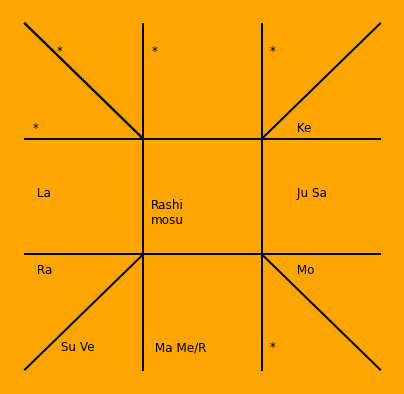

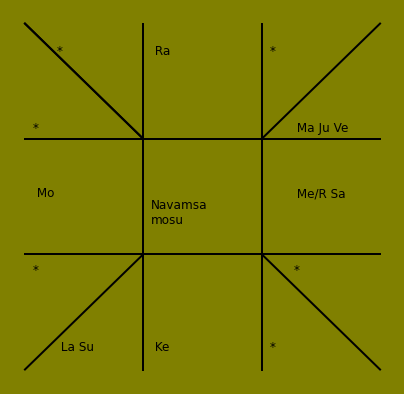

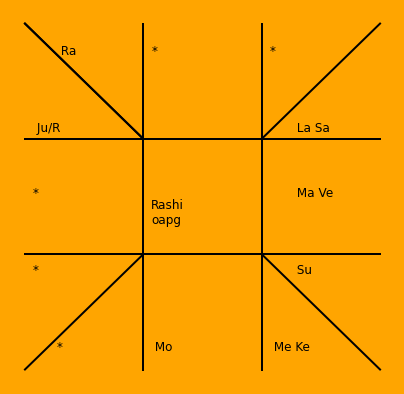

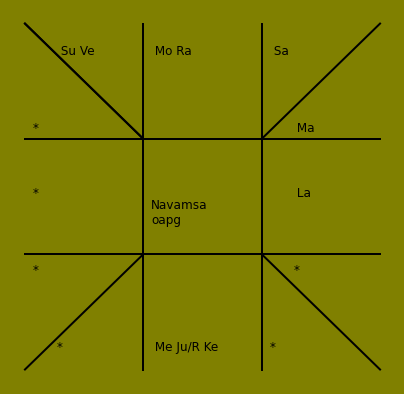

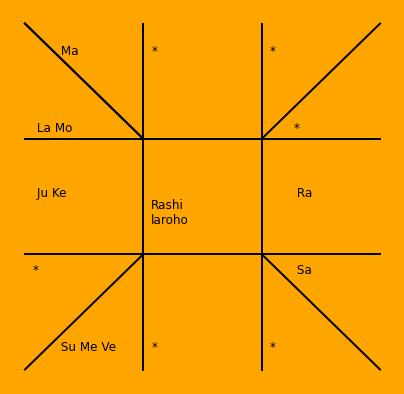

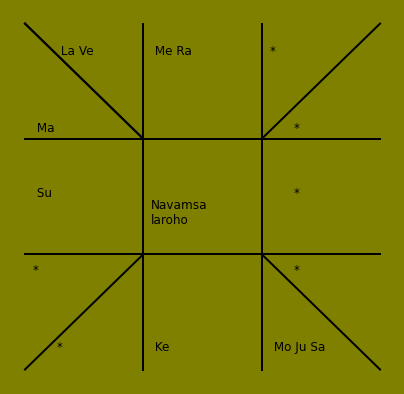

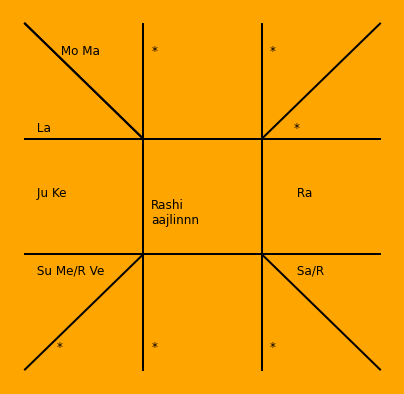

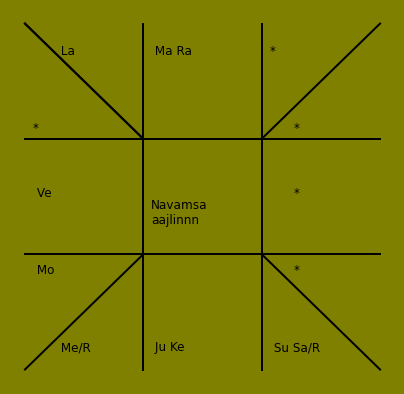

In [ ]:
now = datetime.now(pytz.timezone('Asia/Kolkata'))
fileName = 'Khona21_'+now.strftime("%H%M")+'.doc'
curQueryStr = json.dumps(selCond)
# ---------------------------------------------------------
p21utils.R01_CreateReportDoc(curQueryStr)                      # Creates MS Word Doc called p21.document
# ----------------------------------------------------------
for chart in range(len(df)):
    chartData =df.iloc[chart]
    R51_processChart(chartData)
    print('----')
# ------------------------------------
p21.document.save(fileName)